## DataFrame

<center><img src = "https://pynative.com/wp-content/uploads/2021/02/dataframe.png" alt="My Image"></center>

### 관계형 데이터
- 관계형 데이터는 데이터가 하나 이상의 열과 행의 테이블에 저장되어 서로 다른 데이터 구조가 어떻게 관련되어 있는지 쉽게 파악하고 이해할 수 있도록 사전 정의된 관계로 데이터를 구성하는 정보 모음이다
- 실제로 kaggle, Torch 등 수많은 데이터가 관계형 데이터로 저장이 되어있다
- Pandas의 Data Frame은 관계형 데이터를 저장하는데 효율적이고 알맞는 형식을 제공한다


### DataFrame 구조
- n * m 행렬구조를 가지는 데이터 구조이고 index와 column이 별도의 이름을 가진다. 
- column별로 다른 데이터 타입을 가질 수 있다

In [1]:
import pandas as pd
a = pd.DataFrame([[10,20,30], [40,50,60], [70,80,90]])
print(a) # print 사용시 문자열만을 사용해서 출력된다
print(type(a)) # pandas.core.frame.DataFrame
print(len(a))

    0   1   2
0  10  20  30
1  40  50  60
2  70  80  90
<class 'pandas.core.frame.DataFrame'>
3


In [2]:
a # 변수 호출만 하면 HTML형식으로 출력된다

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [3]:
data = [[10,20,30], [40,50,60], [70,80,90]]
a = pd.DataFrame(
    data, 
    columns = ['1차','2차','3차'], 
    index = ['One','Two','Three']
)
a

,1차,2차,3차
One,10,20,30
Two,40,50,60
Three,70,80,90


### Column Indexing
- dataframe의 column단위로 정보 접근이 가능하다
- 출력은 pandas의 Series형태로 출력된다
- iloc과 loc을 통해서도 indexing이 가능하다

In [4]:
a['1차'] 

One      10
Two      40
Three    70
Name: 1차, dtype: int64

In [5]:
a['2차']

One      20
Two      50
Three    80
Name: 2차, dtype: int64

In [6]:
a[['1차','2차']] # 여러개의 행을 indexing하는것도 가능하다

,1차,2차
One,10,20
Two,40,50
Three,70,80


In [7]:
a.loc[:,'1차'] # loc에서 comma 뒤는 column의 위치이다

One      10
Two      40
Three    70
Name: 1차, dtype: int64

In [8]:
a.iloc[:,0] # iloc을 통해서도 column indexing이 가능하다

One      10
Two      40
Three    70
Name: 1차, dtype: int64

### Row Indexing
- dataframe은 열 단위로도 정보 접근이 가능하다
- loc method를 사용하면 열의 이름으로 접근이 가능하다
- iloc method를 사용하면 정수 인덱싱처럼 접근이 가능하다
- 데이터가 커지면 커질수록 중요한 접근방법이 된다

In [10]:
a.loc['One',] # 열의 이름으로 접근

1차    10
2차    20
3차    30
Name: One, dtype: int64

In [11]:
a.iloc[0:2, 0:2] # 정수인덱싱처럼 접근

,1차,2차
One,10,20
Two,40,50


### DataFrame 생성

<br>

<pre> class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)</pre>

<br>

Data Frame은 list, tuple, Dictionary, Series 등 다양한 방법으로 제작이 가능하다

In [12]:
# Our small data set
d = [0,1,2,3,4,5,6,7,8,9] # DataFrame은 기본적으로 column 단위로 데이터를 관리한다

# create dataframe
df = pd.DataFrame(d)
df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [13]:
names = ['Bob','Jessica','Mary','John','kate']
births = [988,155,77,578,973]
BabySet = list(zip(names, births)) # column단위로 리스트를 만들어서 zip을 이용해서 순서쌍을 만들고 데이터를 생성
df = pd.DataFrame(data = BabySet, columns = ['Names', 'Births'])
df

,Names,Births
0,Bob,988
1,Jessica,155
2,Mary,77
3,John,578
4,kate,973


In [14]:
BabySet

[('Bob', 988), ('Jessica', 155), ('Mary', 77), ('John', 578), ('kate', 973)]

In [13]:
names = ['Bob','Jessica','Mary','John','kate']
births = [988,155,77,578,973]
DicBabySet = {'Names' : names, 'Births' : births} # 사전을 이용해 제작
df = pd.DataFrame(data = DicBabySet)
df # 위의 것과 같은 결과를 출력한다

,Names,Births
0,Bob,988
1,Jessica,155
2,Mary,77
3,John,578
4,kate,973


In [15]:
temp = {
    'Population' : {'california' : 423967, 'Texas' : 695662, 'New York' : 141297, 'Florida' : 170312, 'Illinois' : 149995},
    'Area' : {'california' : 423967, 'Texas' : 695662, 'New York' : 141297, 'Florida' : 170312, 'Illinois' : 149995}
 }

In [21]:
temp['Population']['california']

423967

In [18]:
area_dic = {'california' : 423967, 'Texas' : 695662, 'New York' : 141297, 
            'Florida' : 170312, 'Illinois' : 149995}
pop_dic = {'california' : 1423967, 'Texas' : 1695662, 'New York' : 1141297, 
            'Florida' : 1170312, 'Illinois' : 1149995}
area = pd.Series(area_dic) # Series를 이용해 Dataframe 제작
population = pd.Series(pop_dic) # 두 개의 series 타입에서 키값을 추출해서 자동으로 index화해서 처리

states = pd.DataFrame({'Population' : population, 'Area' : area})
states

,Population,Area
california,1423967,423967
Texas,1695662,695662
New York,1141297,141297
Florida,1170312,170312
Illinois,1149995,149995


In [20]:
states['Population']['california']

1423967

In [15]:
states.index # Index

Index(['california', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [22]:
states.values # ndarray

array([[1423967,  423967],
       [1695662,  695662],
       [1141297,  141297],
       [1170312,  170312],
       [1149995,  149995]])

- dictionary를 통해 각 column에 대한 데이터를 저장한 후 dictionary를 DataFrame Class의 생성자 인자로 넘겨주면 DataFrame 객체가 생성된다

In [23]:
raw_data = {'col0' : [1,2,3,4],
            'col1' : [10,20,30,40],
            'col2' : [100,200,300,400]}

data = pd.DataFrame(raw_data)
print(data)

   col0  col1  col2
0     1    10   100
1     2    20   200
2     3    30   300
3     4    40   400


raw_data dictionary는 'col0','col1','col2'라는 key 값을 가지며 각 key는 list타입의 value를 가진다

In [18]:
data['col0']

0    1
1    2
2    3
3    4
Name: col0, dtype: int64

DataFrame에는 3개의 Series 객체가 있고, 이는 'col0','col1','col2'라는 key를 통해 value에 해당하는 Series 객체에 접근할 수 있다

In [19]:
type(data['col0'])

pandas.core.series.Series

'col0','col1','col2'라는 문자열은 DataFrame의 각 column을 indexing하는데 사용

In [24]:
data

,col0,col1,col2
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [25]:
data.index = ['r0','r1','r2','r3']

In [26]:
data

,col0,col1,col2
r0,1,10,100
r1,2,20,200
r2,3,30,300
r3,4,40,400


In [27]:
data = pd.DataFrame(raw_data, index = ['r0','r1','r2','r3']) # index 이름 직접 지정 가능
data

,col0,col1,col2
r0,1,10,100
r1,2,20,200
r2,3,30,300
r3,4,40,400


In [28]:
data['col2']

r0    100
r1    200
r2    300
r3    400
Name: col2, dtype: int64

**column순서, index 순서 변경**

In [33]:
raw_data = {'col0' : [1,2,3,4],
            'col1' : [10,20,30,40],
            'col2' : [100,200,300,400]}
data = pd.DataFrame(raw_data, columns = ['col1','col2','col0'])
data

,col1,col2,col0
0,10,100,1
1,20,200,2
2,30,300,3
3,40,400,4


In [34]:
data.columns = ['col0','col1','col2']

In [35]:
data # columns argument를 사용하는 경우 column name만 바뀌고 values는 전혀 바뀌지 않는다

,col0,col1,col2
0,10,100,1
1,20,200,2
2,30,300,3
3,40,400,4


In [36]:
df = data.reindex(index = [0,3,2,1]) # reindex를 사용하면 각 열의 데이터가 보존된 채 열 순서를 바꿀 수 있다
df 

,col0,col1,col2
0,10,100,1
3,40,400,4
2,30,300,3
1,20,200,2


In [37]:
df.index = [1,2,3,4]
df # index 속성을 사용하여 바꾸는 경우 index 이름만 바뀐다

,col0,col1,col2
1,10,100,1
2,40,400,4
3,30,300,3
4,20,200,2


### column 추가
- 원하는 위치의 값을 변경 : loc 옵션
- 사전의 연산처럼 없는 행의 이름을 지정하고 데이터를 저장하면 새로운 행이 생성된다

In [30]:
temp['name'] = 0

In [31]:
temp

{'Population': {'california': 423967,
  'Texas': 695662,
  'New York': 141297,
  'Florida': 170312,
  'Illinois': 149995},
 'Area': {'california': 423967,
  'Texas': 695662,
  'New York': 141297,
  'Florida': 170312,
  'Illinois': 149995},
 'name': 0}

In [38]:
df

,col0,col1,col2
1,10,100,1
2,40,400,4
3,30,300,3
4,20,200,2


In [39]:
import numpy as np
df['col3'] = np.nan
df

,col0,col1,col2,col3
1,10,100,1,NaN
2,40,400,4,NaN
3,30,300,3,NaN
4,20,200,2,NaN


In [40]:
df.loc[1, ['col3']] = 2000
df

,col0,col1,col2,col3
1,10,100,1,2000.0
2,40,400,4,NaN
3,30,300,3,NaN
4,20,200,2,NaN


In [41]:
df['Newcol'] = df['col1'] + df['col2'] # column간 연산도 가능하다
df

,col0,col1,col2,col3,Newcol
1,10,100,1,2000.0,101
2,40,400,4,NaN,404
3,30,300,3,NaN,303
4,20,200,2,NaN,202


In [42]:
df.loc[4] = np.nan # loc method를 통해 행 추가도 가능하다
df

,col0,col1,col2,col3,Newcol
1,10.0,100.0,1.0,2000.0,101.0
2,40.0,400.0,4.0,NaN,404.0
3,30.0,300.0,3.0,NaN,303.0
4,NaN,NaN,NaN,NaN,NaN


### Example 1. 
주가를 DataFrame으로 저장해보기

- 22.02.13 ~ 24.02.17일 사이의 일자별 주가 중 시가, 고가, 저가, 종가를 DataFrame으로 저장해보자
- 참고로 시가, 고가, 저가, 종가는 영어로 open, high, low, close라고 부르며 약어로 **OHLC**라고 한다

In [43]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2022, 2, 13)
end = datetime.datetime(2024, 2, 17)
df = wb.DataReader("005930", "naver", start, end)

In [44]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-14,74400,74500,73100,73700,13993255
2022-02-15,74100,74200,73100,73700,9320365
2022-02-16,74600,74900,74200,74800,10767386
2022-02-17,75000,75600,74500,75000,13605382
2022-02-18,74600,74800,73700,74300,10122226
...,...,...,...,...,...
2024-02-08,75000,75200,73600,74100,20810708
2024-02-13,74800,75200,74400,75200,21966745
2024-02-14,73700,74300,73700,74000,12434945


In [45]:
df['Open']

Date
2022-02-14    74400
2022-02-15    74100
2022-02-16    74600
2022-02-17    75000
2022-02-18    74600
              ...  
2024-02-08    75000
2024-02-13    74800
2024-02-14    73700
2024-02-15    74200
2024-02-16    73300
Name: Open, Length: 496, dtype: object

In [46]:
df.Open # 시가

Date
2022-02-14    74400
2022-02-15    74100
2022-02-16    74600
2022-02-17    75000
2022-02-18    74600
              ...  
2024-02-08    75000
2024-02-13    74800
2024-02-14    73700
2024-02-15    74200
2024-02-16    73300
Name: Open, Length: 496, dtype: object

In [47]:
df['Close'] # 종가

Date
2022-02-14    73700
2022-02-15    73700
2022-02-16    74800
2022-02-17    75000
2022-02-18    74300
              ...  
2024-02-08    74100
2024-02-13    75200
2024-02-14    74000
2024-02-15    73000
2024-02-16    72800
Name: Close, Length: 496, dtype: object

### date_range
- pandas의 date_range 함수를 쓰면 모든 날짜/시간을 일일이 입력할 필요 없이 시작일과 종료일 또는 시작일과 기간을 입력하면, 범위 내의 인덱스를 생성해 준다

|**option**|설명|
|:---:|:---:|
|**s**|초|
|**T**|분|
|**H**|시간|
|**D**|Days|
|**B**|Buisness Days|
|**W**|주(일요일기준)|
|**W-MON**|주(월요일기준)|
|**M**|각 달의 마지막 날|
|**MS**|각 달의 첫날|
|**BM**|주말이 아닌 영업일 중에서 각 달의 마지막 날|
|**BMS**|주말이 아닌 영업일 중에서 각 달의 첫날|
|**WOM-2THU**|각 달의 두 번째 목요일|
|**Q-JAN**|각 분기의 첫달의 마지막 날|
|**Q-DEC**|각 분기의 마지막 달의 마지막 날|

In [48]:
pd.date_range('2024-01-01', '2024-02-20')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20'],
              dtype='datetime64[ns]', freq='D')

`to_datetime()` 함수를 사용하면 Datetime Index로 변경할 수 있다

In [49]:
pd.to_datetime(df.index)

DatetimeIndex(['2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25',
               ...
               '2024-02-01', '2024-02-02', '2024-02-05', '2024-02-06',
               '2024-02-07', '2024-02-08', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16'],
              dtype='datetime64[ns]', name='Date', length=496, freq=None)

### 외부 파일 읽어오기
- api형태로 notebook이나 studio를 통해 바로 읽어들일 수 있지만, 프로젝트 수행 시 그렇지 않는 경우가 더 많다
- pandas내의 method를 통해 excel 파일과 csv파일을 Data Frame의 형태로 불러올 수 있다

In [50]:
usd = pd.read_csv('../data/USD_KRW.csv') # excel파일을 불러오고 싶은 경우, read_excel() method 사용

In [51]:
usd

,Date,Price,Open,High,Low,Vol.,Change %
0,09/27/2023,"1,356.82","1,353.80","1,356.82","1,347.60",NaN,0.29%
1,09/26/2023,"1,352.93","1,339.69","1,354.97","1,337.31",NaN,1.12%
2,09/25/2023,"1,338.01","1,335.56","1,341.47","1,330.14",NaN,0.30%
3,09/22/2023,"1,334.03","1,339.57","1,341.81","1,330.74",NaN,-0.37%
4,09/21/2023,"1,339.00","1,333.44","1,344.65","1,331.67",NaN,0.46%
...,...,...,...,...,...,...,...
971,01/07/2020,"1,167.30","1,167.54","1,168.82","1,163.11",NaN,0.03%
972,01/06/2020,"1,166.94","1,165.89","1,172.99","1,165.78",NaN,0.17%
973,01/03/2020,"1,164.95","1,157.94","1,168.83","1,155.70",NaN,0.66%
974,01/02/2020,"1,157.35","1,155.02","1,161.15","1,153.48",NaN,0.29%


In [52]:
usd = pd.read_csv('../data/USD_KRW.csv', index_col = 0) 
# index_col argument = 0 지정시, 맨 첫번째 행이 index가 된다

In [53]:
usd

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
09/27/2023,"1,356.82","1,353.80","1,356.82","1,347.60",NaN,0.29%
09/26/2023,"1,352.93","1,339.69","1,354.97","1,337.31",NaN,1.12%
09/25/2023,"1,338.01","1,335.56","1,341.47","1,330.14",NaN,0.30%
09/22/2023,"1,334.03","1,339.57","1,341.81","1,330.74",NaN,-0.37%
09/21/2023,"1,339.00","1,333.44","1,344.65","1,331.67",NaN,0.46%
...,...,...,...,...,...,...
01/07/2020,"1,167.30","1,167.54","1,168.82","1,163.11",NaN,0.03%
01/06/2020,"1,166.94","1,165.89","1,172.99","1,165.78",NaN,0.17%
01/03/2020,"1,164.95","1,157.94","1,168.83","1,155.70",NaN,0.66%


In [56]:
usd.index = pd.to_datetime(usd.index)
usd.index

DatetimeIndex(['2023-09-27', '2023-09-26', '2023-09-25', '2023-09-22',
               '2023-09-21', '2023-09-20', '2023-09-19', '2023-09-18',
               '2023-09-15', '2023-09-14',
               ...
               '2020-01-14', '2020-01-13', '2020-01-10', '2020-01-09',
               '2020-01-08', '2020-01-07', '2020-01-06', '2020-01-03',
               '2020-01-02', '2020-01-01'],
              dtype='datetime64[ns]', name='Date', length=976, freq=None)

data frame에 존재하는 콤마는 다음과 같이 str메서드를 사용해 제거해줄 수 있다.

In [57]:
usd.Price.str.replace(',','')

Date
2023-09-27    1356.82
2023-09-26    1352.93
2023-09-25    1338.01
2023-09-22    1334.03
2023-09-21    1339.00
               ...   
2020-01-07    1167.30
2020-01-06    1166.94
2020-01-03    1164.95
2020-01-02    1157.35
2020-01-01    1154.02
Name: Price, Length: 976, dtype: object

dtype이 object이므로, 분석을 위해 float형으로 바꾼다. `astype()`을 사용하면 형변환이 가능하다

In [58]:
price = usd.Price.str.replace(',','').astype(float)

In [59]:
price.head()

Date
2023-09-27    1356.82
2023-09-26    1352.93
2023-09-25    1338.01
2023-09-22    1334.03
2023-09-21    1339.00
Name: Price, dtype: float64

In [60]:
price.index = pd.to_datetime(price.index) # index를 변환해주기 위함

In [61]:
price.head()

Date
2023-09-27    1356.82
2023-09-26    1352.93
2023-09-25    1338.01
2023-09-22    1334.03
2023-09-21    1339.00
Name: Price, dtype: float64

`sort_index()` method를 사용하면 index 기준으로 재정렬이 가능하다. 

In [62]:
price.sort_index(ascending = True) # 기본값은 오름차순이다

Date
2020-01-01    1154.02
2020-01-02    1157.35
2020-01-03    1164.95
2020-01-06    1166.94
2020-01-07    1167.30
               ...   
2023-09-21    1339.00
2023-09-22    1334.03
2023-09-25    1338.01
2023-09-26    1352.93
2023-09-27    1356.82
Name: Price, Length: 976, dtype: float64

<Axes: xlabel='Date'>

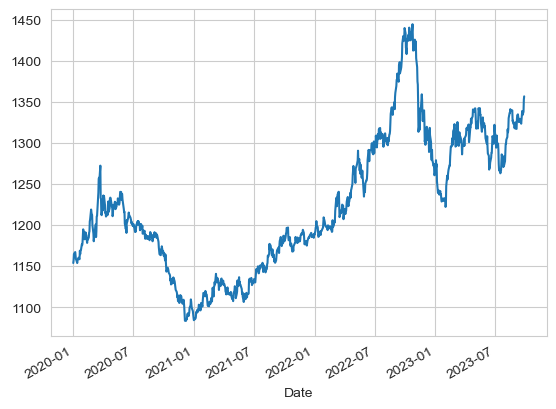

In [63]:
price.plot()

### yfinance

- yahoo finance로부터 데이터를 읽어온다
- 미국 증권거래소에 상장된 대부분의 자산 가격 계열을 문제없이 읽어올 수 있다
- 최대 일별 데이터까지 접근 가능

In [64]:
import yfinance as yf

start_date = '2020-01-01'
end_date = '2024-02-20'
ticker = '^GSPC'
snp500 = yf.download(ticker, start = start_date, end = end_date)
snp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000
2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000
2024-02-14,4976.439941,5002.520020,4956.450195,5000.620117,5000.620117,3845600000


여러 개의 자산들을 한번에 불러올 수 있다

In [65]:
tickers = ['AAPL','MSFT','TSLA','IBM','GOOGL']
markets = yf.download(
    tickers = tickers, start = start_date, end = end_date
)

[*********************100%%**********************]  5 of 5 completed


In [66]:
markets

Adj Close                                                  \
                  AAPL       GOOGL         IBM        MSFT        TSLA   
Date                                                                     
2020-01-02   73.059402   68.433998  105.346336  154.493805   28.684000   
2020-01-03   72.349144   68.075996  104.506195  152.570129   29.534000   
2020-01-06   72.925652   69.890503  104.319489  152.964478   30.102667   
2020-01-07   72.582672   69.755501  104.389503  151.569794   31.270666   
2020-01-08   73.750252   70.251999  105.260765  153.984039   32.809334   
...                ...         ...         ...         ...         ...   
2024-02-12  187.149994  147.529999  186.160004  414.493500  188.130005   
2024-02-13  185.039993  145.139999  183.699997  405.570007  184.020004   
2024-02-14  184.149994  145.940002  183.570007  409.489990  188.710007   
2024-02-15  183.860001  142.770004  186.869995  406.559998  200.449997   
2024-02-16  182.309998  140.520004  187.639999  404.059998  199.949997   

                 Close                                                  ...  \
                  AAPL       GOOGL         IBM        MSFT        TSLA  ...   
Date                                                                    ...   
2020-01-02   75.087502   68.433998  129.464630  160.619995   28.684000  ...   
2020-01-03   74.357498   68.075996  128.432129  158.619995   29.534000  ...   
2020-01-06   74.949997   69.890503  128.202682  159.029999   30.102667  ...   
2020-01-07   74.597504   69.755501  128.288712  157.580002   31.270666  ...   
2020-01-08   75.797501   70.251999  129.359467  160.089996   32.809334  ...   
...                ...         ...         ...         ...         ...  ...   
2024-02-12  187.149994  147.529999  186.160004  415.260010  188.130005  ...   
2024-02-13  185.039993  145.139999  183.699997  406.320007  184.020004  ...   
2024-02-14  184.149994  145.940002  183.570007  409.489990  188.710007  ...   
2024-02-15  183.860001  142.770004  186.869995  406.559998  200.449997  ...   
2024-02-16  182.309998  140.520004  187.639999  404.059998  199.949997  ...   

                  Open                                                  \
                  AAPL       GOOGL         IBM        MSFT        TSLA   
Date                                                                     
2020-01-02   74.059998   67.420502  129.063095  158.779999   28.299999   
2020-01-03   74.287498   67.400002  127.695984  158.320007   29.366667   
2020-01-06   73.447502   67.581497  127.552582  157.080002   29.364668   
2020-01-07   74.959999   70.023003  127.810707  159.320007   30.760000   
2020-01-08   74.290001   69.740997  128.594650  158.929993   31.580000   
...                ...         ...         ...         ...         ...   
2024-02-12  188.419998  148.419998  185.899994  420.559998  192.110001   
2024-02-13  185.770004  144.919998  184.279999  404.940002  183.990005   
2024-02-14  185.320007  146.080002  185.000000  408.070007  185.300003   
2024-02-15  183.550003  143.139999  183.619995  408.140015  189.160004   
2024-02-16  183.419998  142.990005  186.630005  407.959991  202.059998   

               Volume                                          
                 AAPL     GOOGL      IBM      MSFT       TSLA  
Date                                                           
2020-01-02  135480400  27278000  3293436  22622100  142981500  
2020-01-03  146322800  23408000  2482890  21116200  266677500  
2020-01-06  118387200  46768000  2537073  20813700  151995000  
2020-01-07  108872000  34330000  3232977  21634100  268231500  
2020-01-08  132079200  35314000  4545916  27746500  467164500  
...               ...       ...      ...       ...        ...  
2024-02-12   41781900  21564100  4724000  21202900   95498600  
2024-02-13   56529500  27837700  4290500  27824900   86759500  
2024-02-14   54630500  22704200  3173400  20401200   81203000  
2024-02-15   65434500  37590700  4714300  21825500  120831800  


In [67]:
markets.stack() # stack으로 2차원 프레임으로 볼 수 있다

Adj Close       Close        High         Low        Open  \
Date                                                                           
2020-01-02 AAPL    73.059402   75.087502   75.150002   73.797501   74.059998   
           GOOGL   68.433998   68.433998   68.433998   67.324501   67.420502   
           IBM    105.346336  129.464630  129.942642  128.843216  129.063095   
           MSFT   154.493805  160.619995  160.729996  158.330002  158.779999   
           TSLA    28.684000   28.684000   28.713333   28.114000   28.299999   
...                      ...         ...         ...         ...         ...   
2024-02-16 AAPL   182.309998  182.309998  184.850006  181.669998  183.419998   
           GOOGL  140.520004  140.520004  143.190002  140.139999  142.990005   
           IBM    187.639999  187.639999  188.949997  185.949997  186.630005   
           MSFT   404.059998  404.059998  408.290009  403.440002  407.959991   
           TSLA   199.949997  199.949997  203.169998  197.399994  202.059998   

                     Volume  
Date                         
2020-01-02 AAPL   135480400  
           GOOGL   27278000  
           IBM      3293436  
           MSFT    22622100  
           TSLA   142981500  
...                     ...  
2024-02-16 AAPL    49701400  
           GOOGL   31451100  
           IBM      4841900  
           MSFT    22281100  
           TSLA   111173600  

[5195 rows x 6 columns]

종가 데이터만을 사용하려면 다음과 같이 `pandas.concat()`함수를 사용한다

In [72]:
start_date = '2020-01-01'
end_date = '2024-02-20'

tickers = ['AAPL','MSFT','TSLA','IBM','GOOGL']
markets = pd.DataFrame()

for i in tickers :
    markets = pd.concat(
        [markets, yf.download(i, start_date, end_date)['Close']],
        axis = 1 # 오른쪽으로 붙인다
    )
markets.columns = tickers

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [73]:
markets

,AAPL,MSFT,TSLA,IBM,GOOGL
2020-01-02,75.087502,160.619995,28.684000,129.464630,68.433998
2020-01-03,74.357498,158.619995,29.534000,128.432129,68.075996
2020-01-06,74.949997,159.029999,30.102667,128.202682,69.890503
2020-01-07,74.597504,157.580002,31.270666,128.288712,69.755501
2020-01-08,75.797501,160.089996,32.809334,129.359467,70.251999
...,...,...,...,...,...
2024-02-12,187.149994,415.260010,188.130005,186.160004,147.529999
2024-02-13,185.039993,406.320007,184.020004,183.699997,145.139999
2024-02-14,184.149994,409.489990,188.710007,183.570007,145.940002
2024-02-15,183.860001,406.559998,200.449997,186.869995,142.770004


<Axes: title={'center': 'S&P500 Index'}, xlabel='Date'>

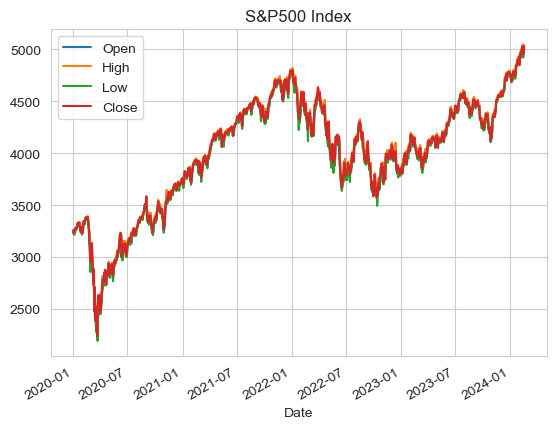

In [74]:
snp500[['Open','High','Low','Close']].plot(
    title = 'S&P500 Index'
)

### Pandas Datareader

- yfinance에서는 국내 데이터를 불러오기 힘들다
- naver finance로부터 자산 가격 정보를 불러오기 위해서는 pandas datareader를 사용해야 한다

In [75]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2024, 2, 20)
kospi = wb.DataReader("KOSPI", "naver", start, end)

In [76]:
kospi

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,2998.32,3010.77,2979.42,2988.77,435825
2022-01-04,2991.97,2995.25,2973.08,2989.24,621549
2022-01-05,2984.05,2986.2,2936.73,2953.97,787346
2022-01-06,2925.4,2952.54,2915.38,2920.53,786045
2022-01-07,2933.78,2959.03,2933.1,2954.89,546172
...,...,...,...,...,...
2024-02-14,2609.6,2627.31,2601.99,2620.42,543525
2024-02-15,2643.81,2643.86,2613.8,2613.8,621363
2024-02-16,2635.63,2648.76,2625.01,2648.76,593842


#### Example 2.

자산 비중을 고려해 포트폴리오를 구성해 보자. 다음과 같은 자산을 고려한다.

- Apple (40%), Google (30%), IBM (10%), Tesla (10%), Meta (10%)

In [77]:
start_date = '2020-01-01'
end_date = '2024-02-20'

tickers = ['AAPL','GOOGL','IBM','TSLA','META']
markets = pd.DataFrame()

for i in tickers :
    markets = pd.concat(
        [markets, yf.download(i, start_date, end_date)['Close']],
        axis = 1 # 오른쪽으로 붙인다
    )
markets.columns = tickers

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


포트폴리오 성과 계산을 위해 우선 일별 수익률을 계산해 주어야 한다.

In [80]:
ret = markets.pct_change().dropna()
ret

,AAPL,GOOGL,IBM,TSLA,META
2020-01-03,-0.009722,-0.005231,-0.007975,0.029633,-0.005291
2020-01-06,0.007968,0.026654,-0.001787,0.019255,0.018834
2020-01-07,-0.004703,-0.001932,0.000671,0.038801,0.002164
2020-01-08,0.016086,0.007118,0.008346,0.049205,0.010138
2020-01-09,0.021241,0.010498,0.010568,-0.021945,0.014311
...,...,...,...,...,...
2024-02-12,-0.009002,-0.009866,-0.000966,-0.028104,0.001688
2024-02-13,-0.011274,-0.016200,-0.013214,-0.021847,-0.018725
2024-02-14,-0.004810,0.005512,-0.000708,0.025486,0.028601
2024-02-15,-0.001575,-0.021721,0.017977,0.062212,0.022714


각 자산별 비중을 곱해준다. broadcasting을 사용하면 계산하기 쉽다

In [81]:
ret_adjusted = ret * [0.4, 0.3, 0.1, 0.1, 0.1]
ret_adjusted

,AAPL,GOOGL,IBM,TSLA,META
2020-01-03,-0.003889,-0.001569,-0.000798,0.002963,-0.000529
2020-01-06,0.003187,0.007996,-0.000179,0.001925,0.001883
2020-01-07,-0.001881,-0.000579,0.000067,0.003880,0.000216
2020-01-08,0.006435,0.002135,0.000835,0.004920,0.001014
2020-01-09,0.008496,0.003149,0.001057,-0.002195,0.001431
...,...,...,...,...,...
2024-02-12,-0.003601,-0.002960,-0.000097,-0.002810,0.000169
2024-02-13,-0.004510,-0.004860,-0.001321,-0.002185,-0.001872
2024-02-14,-0.001924,0.001654,-0.000071,0.002549,0.002860
2024-02-15,-0.000630,-0.006516,0.001798,0.006221,0.002271


각 자산의 일별 수익률을 날마다 합치면 포트폴리오의 수익률이 된다.

In [82]:
ret_sum = ret_adjusted.sum(axis = 1)
ret_sum

2020-01-03   -0.003822
2020-01-06    0.014814
2020-01-07    0.001703
2020-01-08    0.015339
2020-01-09    0.011939
                ...   
2024-02-12   -0.009299
2024-02-13   -0.014748
2024-02-14    0.005068
2024-02-15    0.003144
2024-02-16   -0.010150
Length: 1038, dtype: float64

<Axes: >

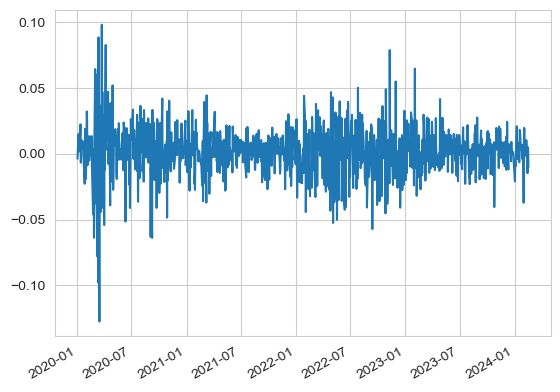

In [83]:
ret_sum.plot()

누적 수익률을 구하면 포트폴리오의 성과를 확인할 수 있다

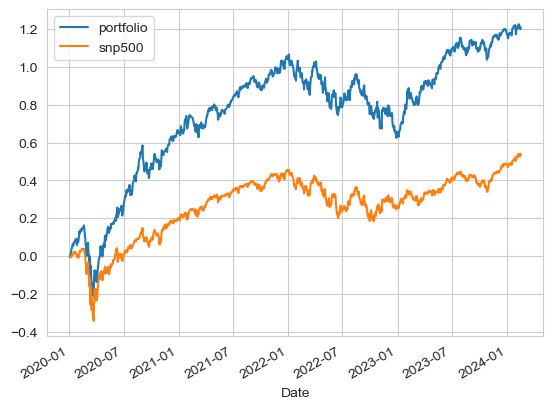

In [87]:
import matplotlib.pyplot as plt
ret_sum.cumsum().plot(label = 'portfolio')
snp500.Close.pct_change().dropna().cumsum().plot(label = 'snp500')
plt.legend()

## Matplotlib
- 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화하는 패키지이다
- 차트 이외에도 폰트 설정 등 여러가지 설정이 가능하다

https://matplotlib.org/stable/index.html

In [88]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2024, 2, 20)
df = wb.DataReader("KOSPI", "naver", start, end)

In [89]:
df.head() # 상위 5개만 출력

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,2998.32,3010.77,2979.42,2988.77,435825
2022-01-04,2991.97,2995.25,2973.08,2989.24,621549
2022-01-05,2984.05,2986.2,2936.73,2953.97,787346
2022-01-06,2925.4,2952.54,2915.38,2920.53,786045
2022-01-07,2933.78,2959.03,2933.1,2954.89,546172


In [90]:
price = df.Close
price.head() # 종가 데이터만 Series로 저장

Date
2022-01-03    2988.77
2022-01-04    2989.24
2022-01-05    2953.97
2022-01-06    2920.53
2022-01-07    2954.89
Name: Close, dtype: object

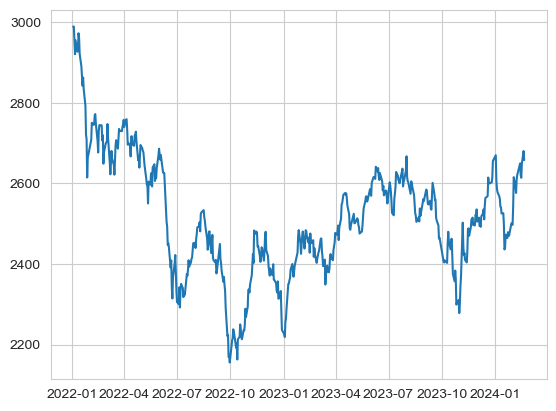

In [91]:
import matplotlib.pyplot as plt
price = pd.DataFrame(price.astype(float).values, columns = ['price'], index = price.index)
plt.plot(price) # plotting

In [92]:
price.head() # DataFrame

,price
Date,
2022-01-03,2988.77
2022-01-04,2989.24
2022-01-05,2953.97
2022-01-06,2920.53
2022-01-07,2954.89


### 범례 출력
- label로 라벨을 지정하고 legend( ) 함수를 통해서 범례를 출력할 수 있다

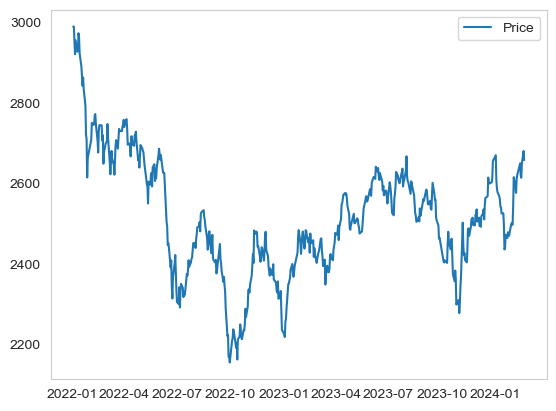

In [93]:
plt.plot(price, label = 'Price') # label 지정 가능
plt.grid(False)
plt.legend() # 범례 출력

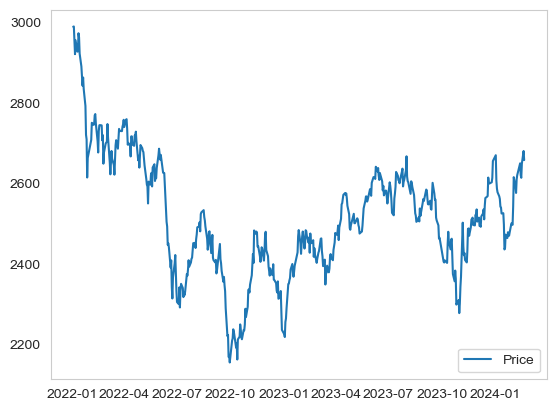

In [95]:
plt.plot(price, label = 'Price') 
plt.grid(False)
plt.legend(loc = 'lower right') # loc argument를 통해 위치를 바꿀 수 있다

### Figure Style
- Matplotlib에서 표의 형태를 조절할 수 있는 몇가지 방법이 존재한다

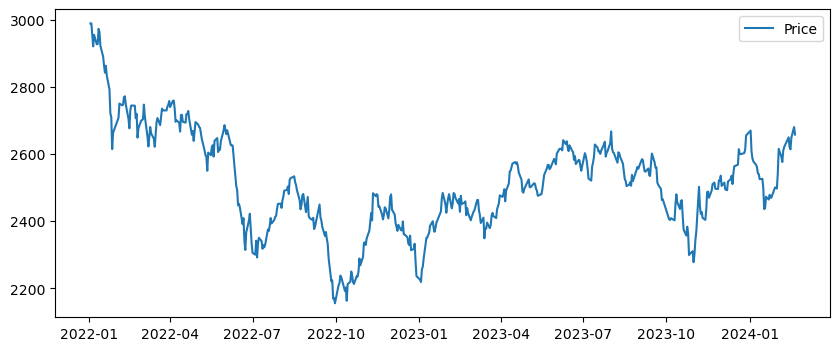

In [97]:
plt.style.use('default') # plot 스타일 지정 가능, 구글링 해서 원하는 테마로 설정할 것
plt.figure(figsize = (10,4)) # plot size 지정 가능. figsize argument를 통해 사이즈를 조절할 수 있다
plt.plot(price, label = 'Price') 
plt.grid(False)
plt.legend(loc = 'upper right') 

Text(0.5, 1.0, 'KOSPI Index')

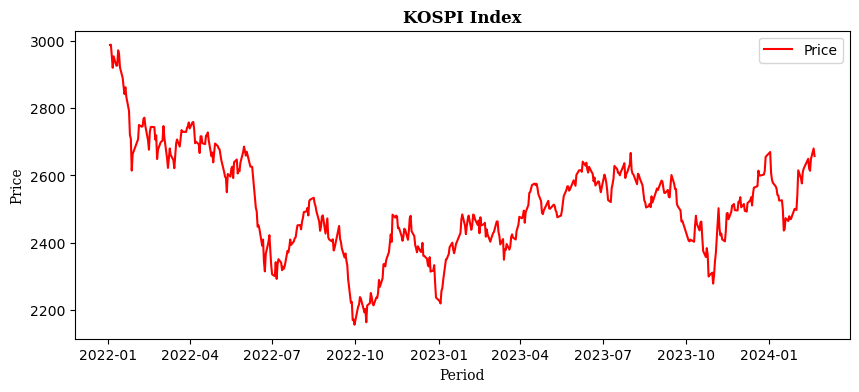

In [98]:
# plt.style.use('seaborn') 
plt.figure(figsize = (10,4))
plt.plot(price, label = 'Price', color = 'red') # color argument를 통해 색상 변경 가능
plt.legend(loc = 'upper right') 
plt.xlabel('Period', fontsize = 10, fontfamily = 'Serif') # label을 따로 붙일 수 있다
plt.ylabel('Price', fontsize = 10, fontfamily = 'Serif') # fontsize, fontfamily로 폰트 스타일 조정가능
plt.title('KOSPI Index', fontsize = 12, fontweight = 'bold', fontfamily = 'Serif') # fontweight로 굵기 조절 

이외로도 matplotlib에서 외부 폰트를 직접 불러와 사용 가능하다(구글링 후 사용방법 참조)

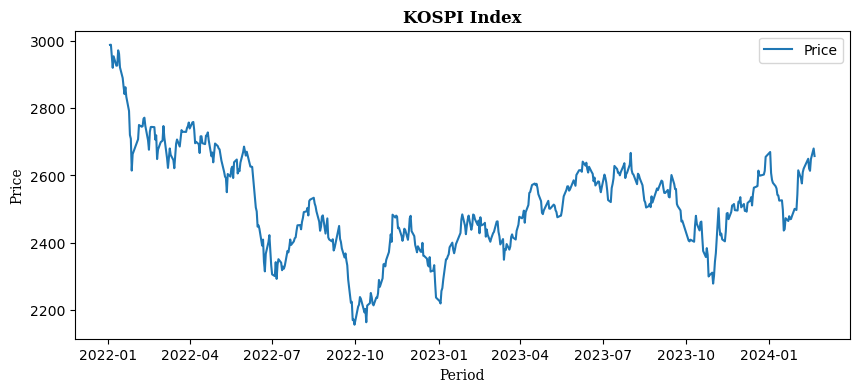

In [99]:
# plt.style.use('seaborn') 
plt.figure(figsize = (10,4))
plt.grid(False) # grid 표시 설정가능
plt.plot(price, label = 'Price') 
plt.legend(loc = 'upper right') 
plt.xlabel('Period', fontsize = 10, fontfamily = 'Serif') # label을 따로 붙일 수 있다
plt.ylabel('Price', fontsize = 10, fontfamily = 'Serif') # fontsize, fontfamily로 폰트 스타일 조정가능
plt.title('KOSPI Index', fontsize = 12, fontweight = 'bold', fontfamily = 'Serif') # fontweight로 굵기 조절 
plt.show() # show() method 사용시 여러개의 그래프를 한번에 표시 가능하다

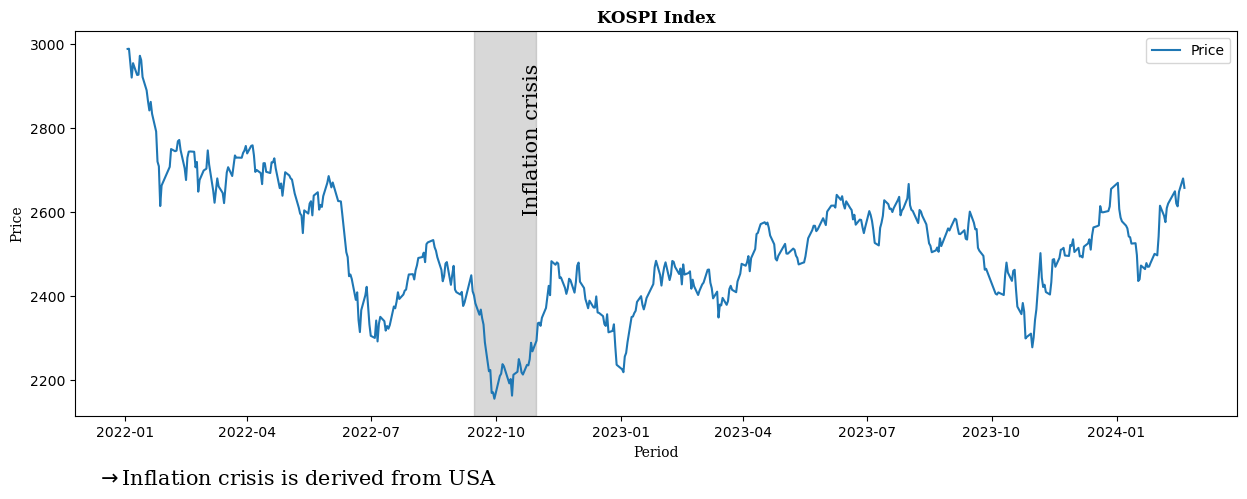

In [100]:
# plt.style.use('seaborn') 
plt.figure(figsize = (15,5))
plt.grid(False) # grid 표시 설정가능
plt.plot(price, label = 'Price') 
plt.legend(loc = 'upper right') 
plt.xlabel('Period', fontsize = 10, fontfamily = 'Serif') # label을 따로 붙일 수 있다
plt.ylabel('Price', fontsize = 10, fontfamily = 'Serif') # fontsize, fontfamily로 폰트 스타일 조정가능
plt.title('KOSPI Index', fontsize = 12, fontweight = 'bold', fontfamily = 'Serif') # fontweight로 굵기 조절 
plt.axvspan('2022-09-15', '2022-10-31', color = 'gray', alpha = 0.3) # axvspan() : 정해진 구간동안 회색 음영 처리 가능
plt.text(19286, 2600, 'Inflation crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
# rotation argument를 통해 개체를 회전시킬 수 있다
plt.text(18972, 1950 , r'$\rightarrow$Inflation crisis is derived from USA', ha = 'left', fontsize = 15, fontfamily = 'Serif')
# text method를 통해서 text를 집어넣을 수 있다
plt.show() # show() method 사용시 여러개의 그래프를 한번에 표시 가능하다

### Histogram

In [101]:
price

,price
Date,
2022-01-03,2988.77
2022-01-04,2989.24
2022-01-05,2953.97
2022-01-06,2920.53
2022-01-07,2954.89
...,...
2024-02-14,2620.42
2024-02-15,2613.80
2024-02-16,2648.76


(array([ 22.,  22.,  76., 118., 109.,  94.,  52.,  17.,   5.,  10.]),
 array([2155.49 , 2238.865, 2322.24 , 2405.615, 2488.99 , 2572.365,
        2655.74 , 2739.115, 2822.49 , 2905.865, 2989.24 ]),
 <BarContainer object of 10 artists>)

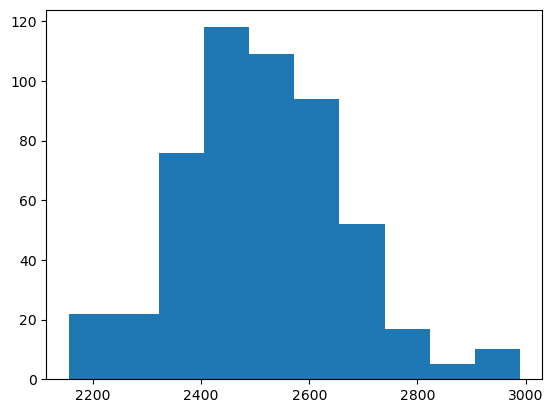

In [102]:
plt.hist(price)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

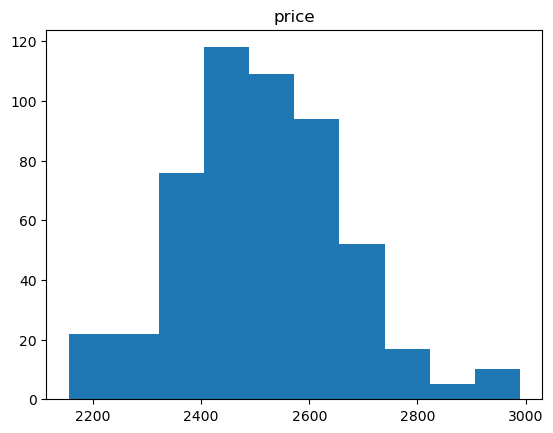

In [103]:
price.hist(grid = False) # series에 hist() method 사용 시 히스토그램 출력

array([[<Axes: title={'center': 'price'}>]], dtype=object)

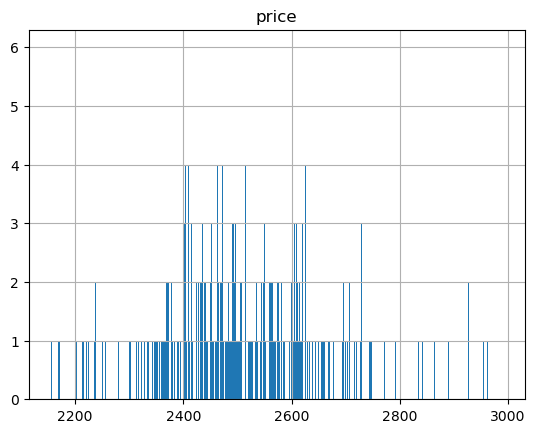

In [107]:
price.hist(bins = 1000) # bins로 구간을 조절할 수 있다

array([[<Axes: title={'center': 'price'}>]], dtype=object)

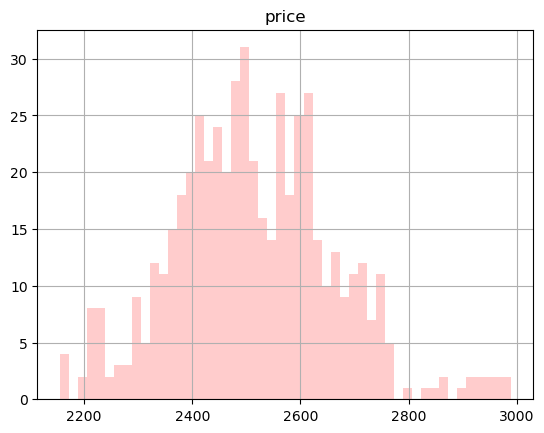

In [108]:
price.hist(facecolor = 'r', alpha = 0.2, bins = 50) # alpha(투명도)와 facecolor를 통해 색상 조절 가능